In [40]:
import math
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import fsolve

### Q4(c)

#### sympy

In [101]:
# from sympy import Eq, exp, solve, symbols

In [102]:
# z = symbols('z')

# # setting up the complex equation z^2 + 1 = 0
# equation = Eq(z**2 + 1, 0)

# # solving the equation symbolically to find complex solutions
# solutions = solve(equation, z)

# print(solutions)

In [103]:
# def get_qty(alpha):
    # qvar = symbols('q')
    # eq = Eq(1.1- 2*qvar + alpha*2.5*(exp(-2*qvar)/2 - exp(-10*qvar)/10), 0)
    # q = solve(eq, qvar)
    # return q

In [104]:
# alphavec = [0, 0.01, 0.05, 0.10, 0.20, 0.50, 1]
# qvec = []
# for alpha in alphavec:
#     q = get_qty(alpha)
#     print(alpha, q[0])
#     qvec.append(q[0])
# plt.plot(alphavec, qvec)
# plt.show()

#### fsolve

In [47]:
def get_qty(alpha):
    return lambda q: 1.1 - 2*q + alpha*2.5*(math.exp(-2*q)/2 - math.exp(-10*q)/10)

0.0001 0.5500207525052178
0.001 0.550207448340487
0.01 0.5520668580941308
0.05 0.5601697108837163
0.1 0.5699488864037865
0.2 0.5884588647330021
0.5 0.6372577593095735
1 0.7030693463334905
1.5 0.756418945622789
2 0.8015213346535381
3 0.875464466325547
4 0.9351500912986259
5 0.9854114069825046
5.33 1.0004236821903072
6 1.0289406269435826
8 1.1018991155302036
10 1.1618861037460062


/var/folders/h6/k0hvphys1p5b28sdmwwfkh9r0000gn/T/ipykernel_77742/249288800.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return lambda q: 1.1 - 2*q + alpha*2.5*(math.exp(-2*q)/2 - math.exp(-10*q)/10)


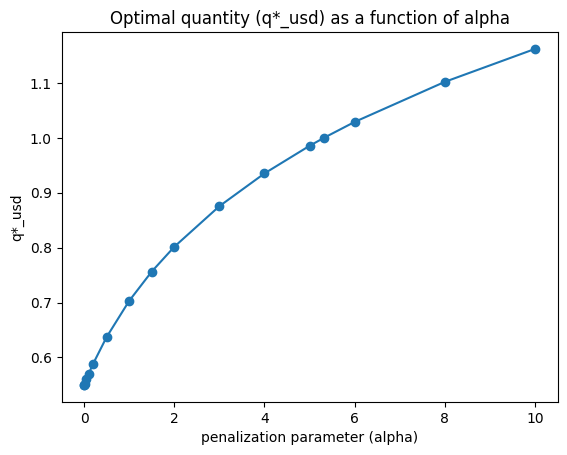

In [95]:
alphavec = [0.0001, 0.001, 0.01, 0.05, 0.10, 0.20, 0.50, 1, 1.5, 2, 3, 4, 5, 5.33, 6, 8, 10]
qvec = []
for alpha in alphavec:
    func = get_qty(alpha)
    # fsolve requires an initial guess that we put 0 here (everytime)
    q = fsolve(func, 0)
    print(alpha, q[0])
    qvec.append(q[0])
plt.plot(alphavec, qvec)
plt.scatter(alphavec, qvec)
plt.xlabel("penalization parameter (alpha)")
plt.ylabel("q*_usd")
plt.title("Optimal quantity (q*_usd) as a function of alpha")
plt.show()

0.0001 0.41505010435427536
0.001 0.4148966809738308
0.01 0.4133716188261527
0.05 0.4067884353486484
0.1 0.39897772807572895
0.2 0.38458864733002085
0.5 0.3490310372382939
1 0.3061386926669809
1.5 0.2752252608303853
2 0.2515213346535381
3 0.21697631088369795
4 0.19257504564931294
5 0.17416456279300183
5.33 0.1690145148931734
6 0.15964687564786084
8 0.13797477888255089
10 0.12237722074920124


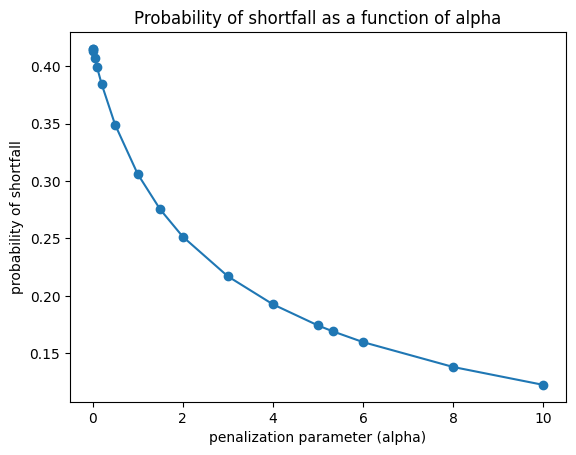

In [96]:
probvec = (2*np.array(qvec)-1.1)/np.array(alphavec)
for i in range(len(alphavec)):
    print(alphavec[i], probvec[i])
plt.plot(alphavec, probvec)
plt.scatter(alphavec, probvec)
plt.xlabel("penalization parameter (alpha)")
plt.ylabel("probability of shortfall")
plt.title("Probability of shortfall as a function of alpha")
plt.show()

### Q4 (d)

We would pick such an alpha for which:
- probability of shortfall is as low as possible (to make shortfall acceptable, we want its probability to be as low as possible since it is a negative/undesirable event)
- price>=0 (price<0 does not make sense)

So, this is how we think:
- The probability of shortfall is decreasing in alpha; so the higher the alpha, the lower the probability and the better.
- However, q*_usd is increasing in alpha. As we increase alpha, q*_usd increases.
- Since price = 1-quantity, price>=0 ---> quantity <= 1 ---> q*_usd <= 1.
- So, to minimize probability of shortfall, pick maximum possible alpha that is feasible ---> pick maximum possible quantity that is feasible ---> q*_usd = 1.

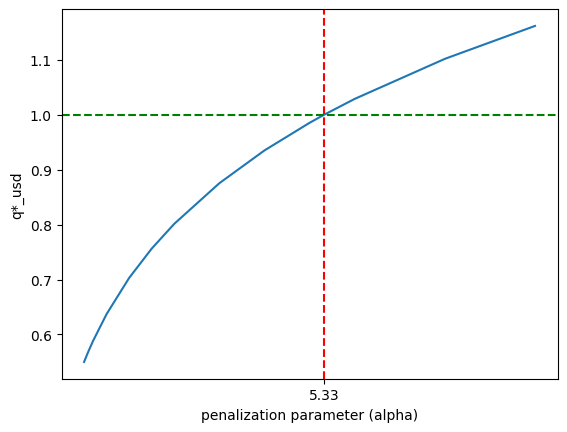

In [98]:
plt.plot(alphavec, qvec)
plt.xlabel("penalization parameter (alpha)")
plt.ylabel("q*_usd")
plt.axhline(y = 1, color='green', linestyle='--')
plt.axvline(x = 5.33, color='red', linestyle='--')
plt.xticks([5.33], ["5.33"])
plt.show()

- For this q*_usd, alpha = 5.33

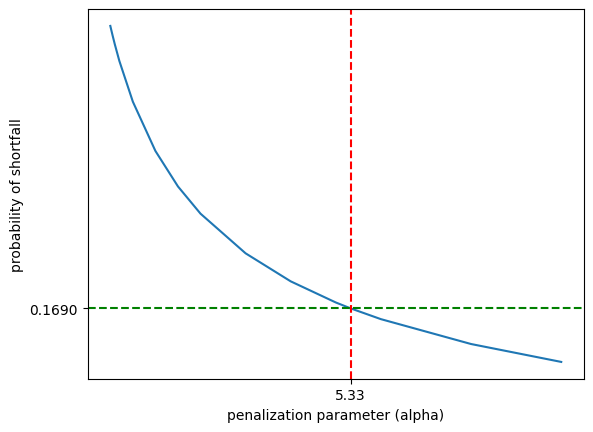

In [100]:
plt.plot(alphavec, probvec)
plt.xlabel("penalization parameter (alpha)")
plt.ylabel("probability of shortfall")
plt.xticks([5.33], ["5.33"])
plt.axvline(x = 5.33, color='red', linestyle='--')
plt.axhline(y = 0.1690, color='green', linestyle='--')
plt.yticks([0.1690], ["0.1690"])
plt.show()

- For this alpha, probability of shortfall = 16.90%.

### So, I recommend alpha = 5.33 to make the shortfall acceptable!